<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-dsercam/blob/main/DataAnalysisWithPython/Module5_A01182676.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color="darkblue">Data Analysis with Python (IBM)</font>**
##**<font color="darkorange"> Module 5: Notes and exercises Jupyter Notebook</font>**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Ciencia y analítica de datos**
####**Tecnológico de Monterrey**
#####**Prof: María de la Paz Rico Fernández**

###**<font color="darkgray">Nombre del estudiante: Dante Rodrigo Serna Camarillo</font>**
###**<font color="darkgray">Matrícula: A01182676</font>**

<b><font color="darkpurple"> Jupyter Notebook Github URL:
<br>
IBM Module 5 Lab - Github URL: https://github.com/PosgradoMNA/actividades-de-aprendizaje-dsercam/blob/main/DataAnalysisWithPython/LabsIBM/DA0101EN-5-Review-Model-Evaluation-and-Refinement.jupyterlite.ipynb
</font></b>

### <b><font color="darkpurple">1. MODEL EVALUATION</font></b>

- How our model performs in the real world?
- Splitting our data into train data and test data. The train data help us develop the model and the test data is used to approximate how the model would perform in the real world.
  - Usually the larger portion of data is used for training and the remainder for testing.
<br>



In [15]:
# Get the CSV to perform some examples
import pandas as pd 
import numpy as np
csv_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
masterDataFrame = pd.read_csv(csv_path, skipinitialspace=True, header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
masterDataFrame.columns = headers
masterDataFrame.replace("?",0, inplace=True)
masterDataFrame["price"] = masterDataFrame["price"].astype("float")
masterDataFrame.shape



(205, 26)

In [16]:
x_data = masterDataFrame.loc[:,"symboling":"highway-mpg"]
y_data = masterDataFrame.loc[:, ["price"]]
print(x_data.shape)
print(y_data.shape)

(205, 25)
(205, 1)


In [98]:
#test_train_split() is a popular function to split datasets into training and testing portions.
# it can be imported from sklearn.model_selection 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

In [19]:
print(x_train.shape)
print(x_test.shape)

(143, 25)
(62, 25)


In [24]:
#cross validation
# each observation is used for training and testing, data set is divided into n partitions, where all partitions will be used for training and validation, on different iterations.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
#cross evaluation provides info on model performance
scores = cross_val_score(lr,x_data, y_data, cv=3)

### <b><font color="darkpurple">2. over-fitting, underfitting and model selection</font></b>

- pick the best polynomial order for our problem. Which order provides the best esitamte of the funciton?
- UNDERFITTING: The model is too simple to fit the data
- OVERFITTING: The model is to flexible, reaching a point where it fits to the noise rather than generalizing a funciton for the data.
  - Training errors tend to decrease with the increment of the polynomial order, as it is trying to appproach the data points closer.
<br>



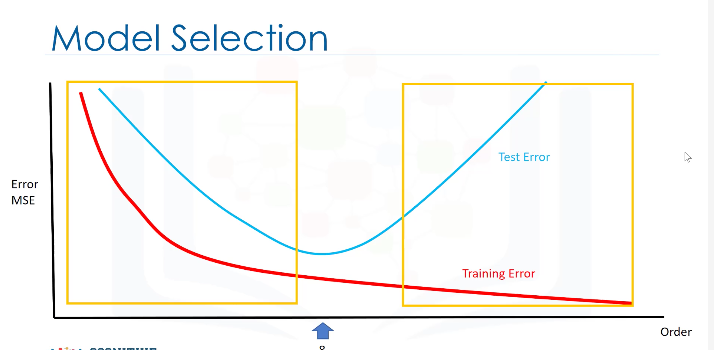

Consider there is always an irreducible error.

### <b><font color="darkpurple">3. Ridge Regression</font></b>

- Ridge regression prevents overfitting
- some outliers may deviate our model from the relevant data points
- polynomial coefficents then to grow in high order polynomials, Ridge regression will control the magnitude of the coefficients makinng use of an alpha paramer.
- <font color="darkpurple">IMPORTANT! IF ALPHA IS TOO LARGE, THE COEFFICIENTS WILL APPROACH ZERO AND THE WE WILL HAVE AN UNDERFITTING ISSUE.</font></b>
<br>



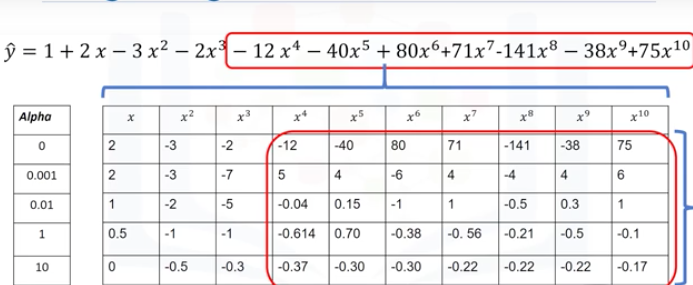

### <b><font color="darkpurple">4. Grid Search</font></b>

- Gride search allows us to scan through different configuration of a model parameters -hyperparameters- to obtain the configurations that generate best performing model.
- we can use sklearn grid search.
- for example, we can select the hyperparameters that minimize the mean squarred error or maximizes the R squared.
- we use python dictionaries to define the hyperparametrs for our grid search.

<br>



In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters= [{'alpha':[0.001,0.01,0.1,1.0,10.0]}]

ridge = Ridge()

gridsearch = GridSearchCV(ridge, parameters, cv=4)

gridsearch.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']], y_data)

gridsearch.best_estimator_
scores = gridsearch.cv_results_
scores['mean_test_score']

array([0.62546088, 0.62546102, 0.62546237, 0.62547584, 0.62560951])

## <b><font color="darkorange">LAB </font></b>


#### <b><font color="darkorange">PART 1</font></b>


In [95]:
import pandas as pd
import numpy as np
csv_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
masterDataFrame = pd.read_csv(csv_path, skipinitialspace=True, header=None)

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
masterDataFrame.columns = headers
masterDataFrame.replace("?",0, inplace=True)
masterDataFrame["horsepower"] = masterDataFrame["horsepower"].astype("float")
masterDataFrame["price"] = masterDataFrame["price"].astype("float")
masterDataFrame["normalized-losses"] = masterDataFrame["normalized-losses"].astype("float")
masterDataFrame.shape


(205, 26)

In [49]:
df=masterDataFrame._get_numeric_data() # will get numeric data only
df.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,154.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,102.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,115.0,18,22,17450.0


In [33]:
#libraries for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

In [48]:
#functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()    

In [96]:
#split our data 90/10
y_data = df['price']
x_data =df.drop('price',axis=1)

In [51]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 184


In [52]:
#Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. 
#Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1"

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

In [53]:
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 82
number of training samples: 123


In [56]:
#import lienar regression and train the model using the first 90/10 splits
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

lre.fit(x_train[['horsepower']], y_train)
print(lre.score(x_test[['horsepower']], y_test))
print(lre.score(x_train[['horsepower']], y_train))

0.5744047287500377
0.4682240627992047


In [58]:
#Find the R^2 on the test data using 40% of the dataset for testing.

lre=LinearRegression()

lre.fit(x_train1[['horsepower']], y_train1)
print(lre.score(x_test1[['horsepower']], y_test1))
print(lre.score(x_train1[['horsepower']], y_train1))

0.11692229893889139
0.6258817473478595


In [59]:
#cross validation score
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [62]:
#The default scoring is R^2. Each element in the array has the average R^2 value for the fold:
Rcross

array([ 0.58158897,  0.46099721, -0.20242794,  0.39382224])

In [63]:
#We can calculate the average and standard deviation of our estimate:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.3084951225285125 and the standard deviation is 0.30255587533490924


In [64]:
#We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([40563743.66350117, 48913354.66939837, 61998291.09956131,
       11169520.86787867])

In [65]:
#Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
print("The mean of the second folds is", Rcross.mean())

The mean of the second folds is 0.009715907376207367


In [66]:
#You can also use the function 'cross_val_predict' to predict the output. 
#The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([13744.31781462, 13744.31781462, 18650.04373946, 12717.53796989,
       14200.66441228])

####<b><font color="darkorange">*PART* 2 </font></b>


In [67]:
#PREDICT USING TARINING DATA
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 5558.5620043 , 10653.95803679,  8540.2285408 , 15243.59134242,
        6746.79235842])

In [68]:
#PREDICT USING TEST DATA
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([ 6118.734327  ,  6995.2466562 ,  6261.54058801,  4493.39222604,
       10123.6937061 ])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


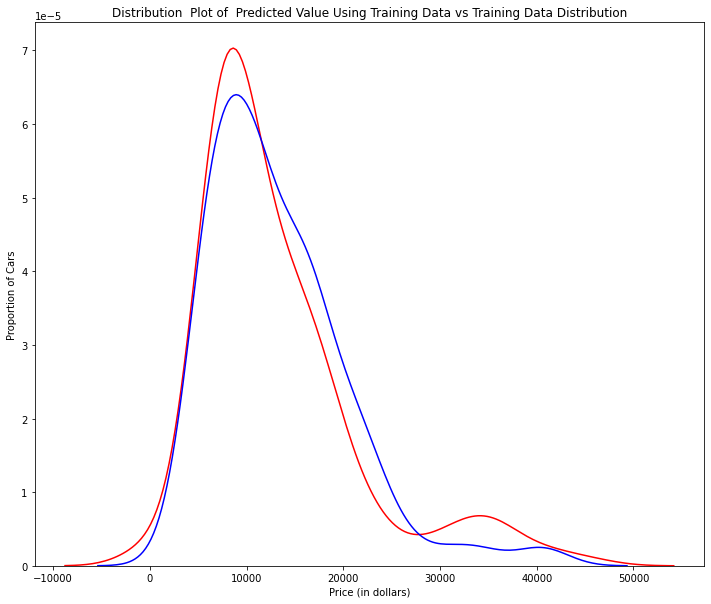

In [69]:
#PLOT TRAINING DATA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


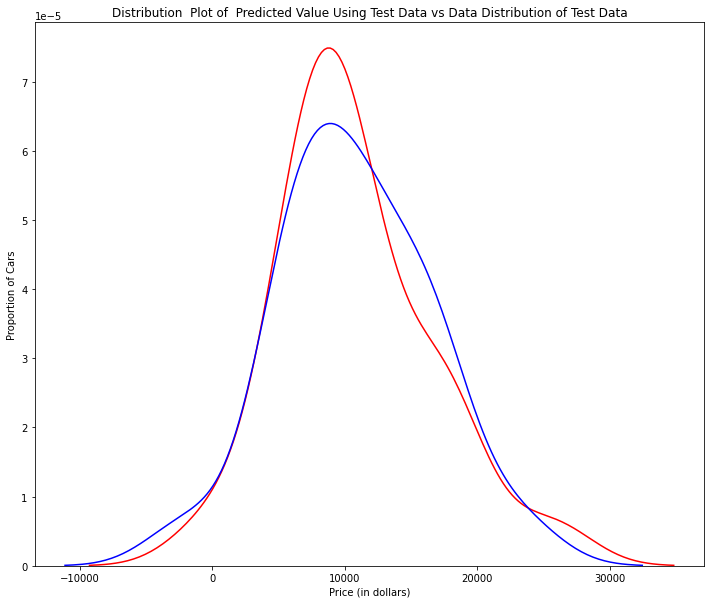

In [70]:
#PLOT TEST DATA
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [71]:
#ABOUT OVERFIITING
from sklearn.preprocessing import PolynomialFeatures

In [73]:
#Let's use 55 percent of the data for training and the rest for testing:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [74]:
#We will perform a degree 5 polynomial transformation on the feature 'horsepower
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr


PolynomialFeatures(degree=5)

In [77]:
#Now, let's create a Linear Regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6981.02889783, 20667.50235164, 14484.49598328,  8918.95625689,
       12710.19535699])

In [79]:
#Let's take the first five predicted values and compare it to the actual targets.
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6981.02889783 20667.50235164 14484.49598328  8918.95625689]
True values: [ 6795. 15750. 15250.  5151.]


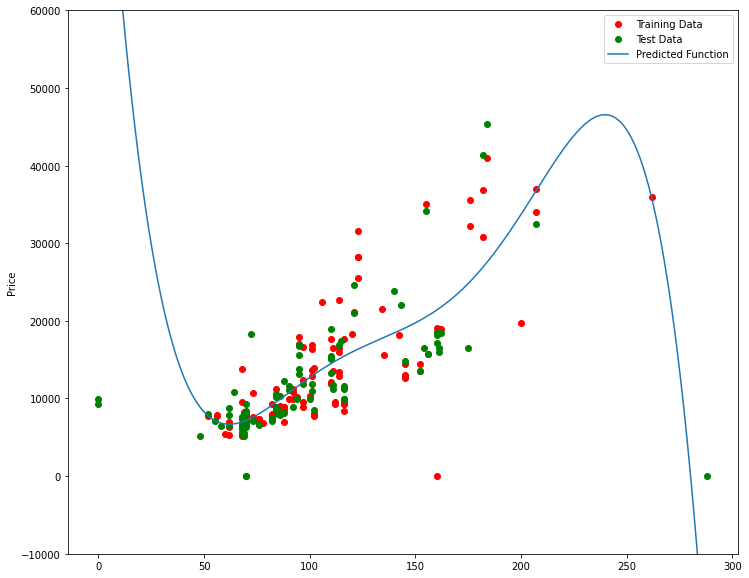

In [81]:
#We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)
#We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [83]:
#We see the R^2 for the training data is positive while the R^2 on the test data was negative. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.
print(poly.score(x_train_pr, y_train))
print(poly.score(x_test_pr, y_test))

0.6305250143680753
-2.7540973692551947


Text(3, 0.75, 'Maximum R^2 ')

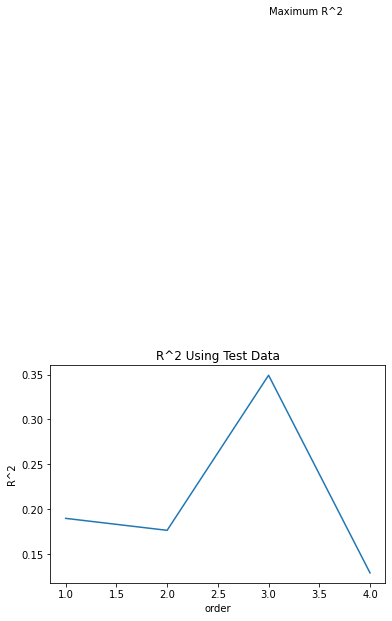

In [84]:
#Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [85]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [86]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [88]:
#We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.
pr1 = PolynomialFeatures(degree=2)
#Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
pr


PolynomialFeatures(degree=4)

In [90]:
#How many dimensions does the new feature have? Hint: use the attribute "shape".

x_train_pr1.shape

(112, 15)

In [92]:
#Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


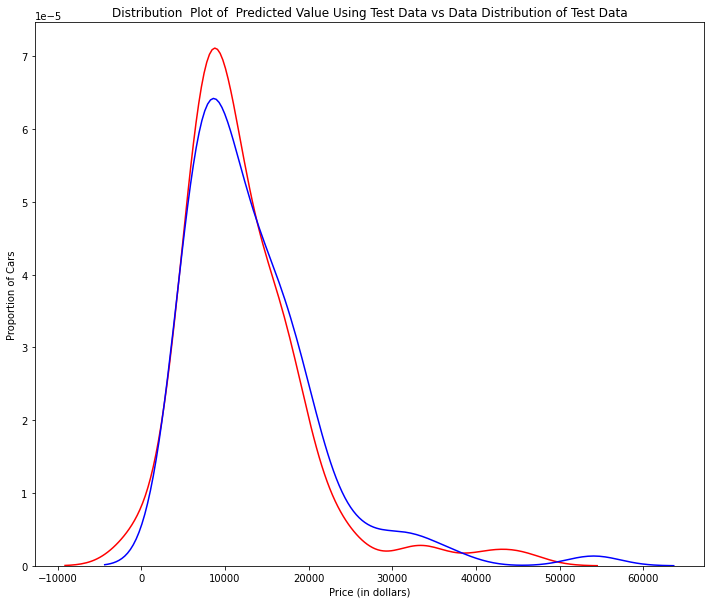

In [93]:
#Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.
yhat1 = poly1.predict(x_test_pr1)
DistributionPlot(y_test,yhat1,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
#The predicted value is higher than actual value for cars where the price is in the $10,000 range
#the predicted price is lower than the price cost in the $30,000 to $40,000 range

####<b><font color="darkorange">PART 3 </font></b>

In [101]:
from sklearn.linear_model import Ridge

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','symboling']])

#Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1 and fit it
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)

yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 5742.00984024 18403.19122861 12532.72152584 11136.21357849]
test set : [ 6795. 15750. 15250.  5151.]


In [102]:

#We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:08<00:00, 119.65it/s, Test Score=-.063, Train Score=0.826]


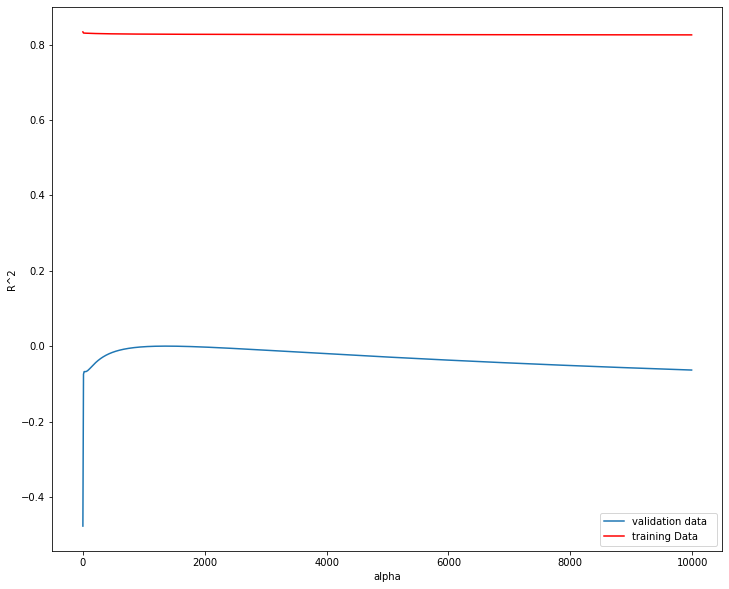

In [104]:
#We can plot out the value of R^2 for different alphas:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [105]:
#Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.
RigeModel=Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)


-0.0742124965626838

####<b><font color="darkorange">PART 4</font></b>

In [106]:
#Let's import GridSearchCV from the module model_selection.
from sklearn.model_selection import GridSearchCV

#We create a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [107]:
RR=Ridge()
RR

Ridge()

In [108]:
#Create a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [109]:
#Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [110]:

#The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [112]:
#We now test our model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.6583420834912923

## **<font color="darkorange">GRADED REVIEW QUESTIONS - EVIDENCE.</font>**

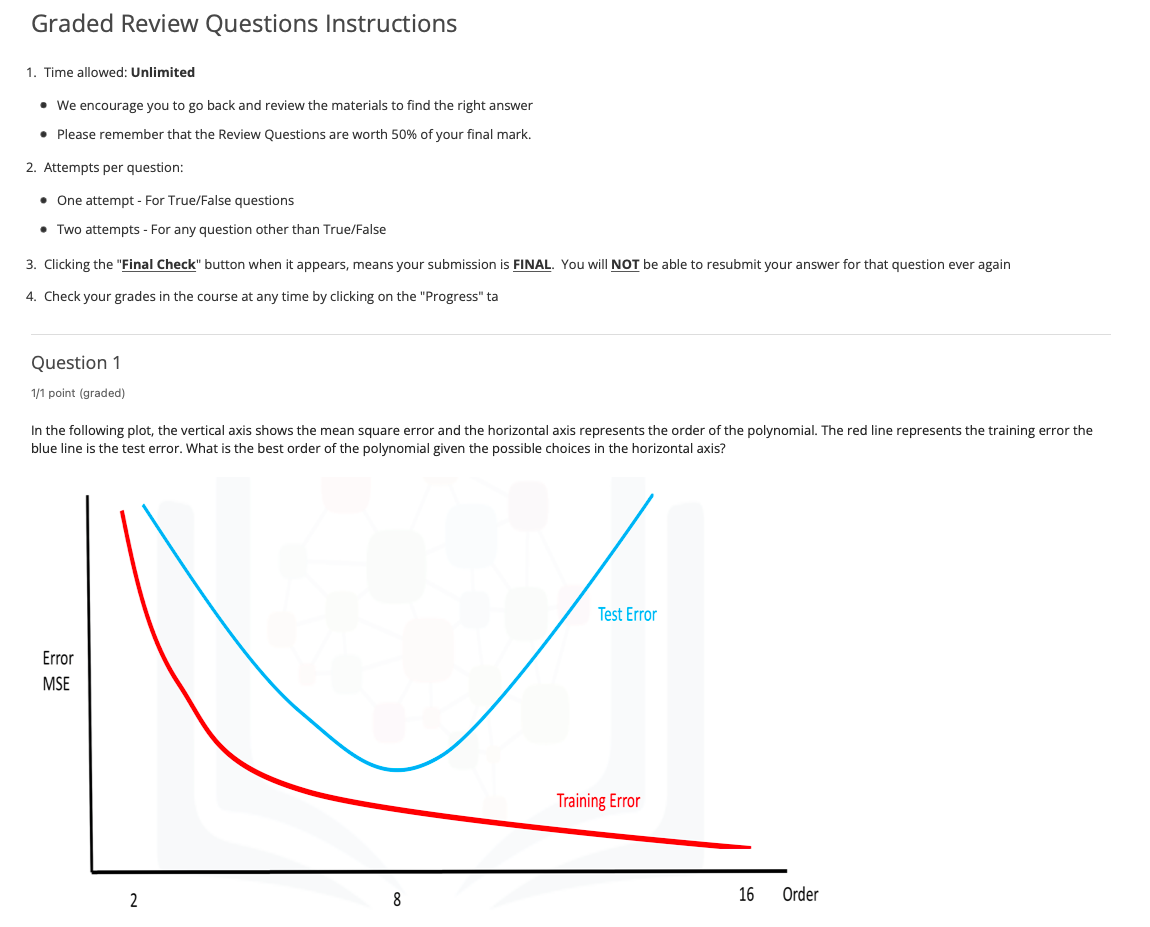

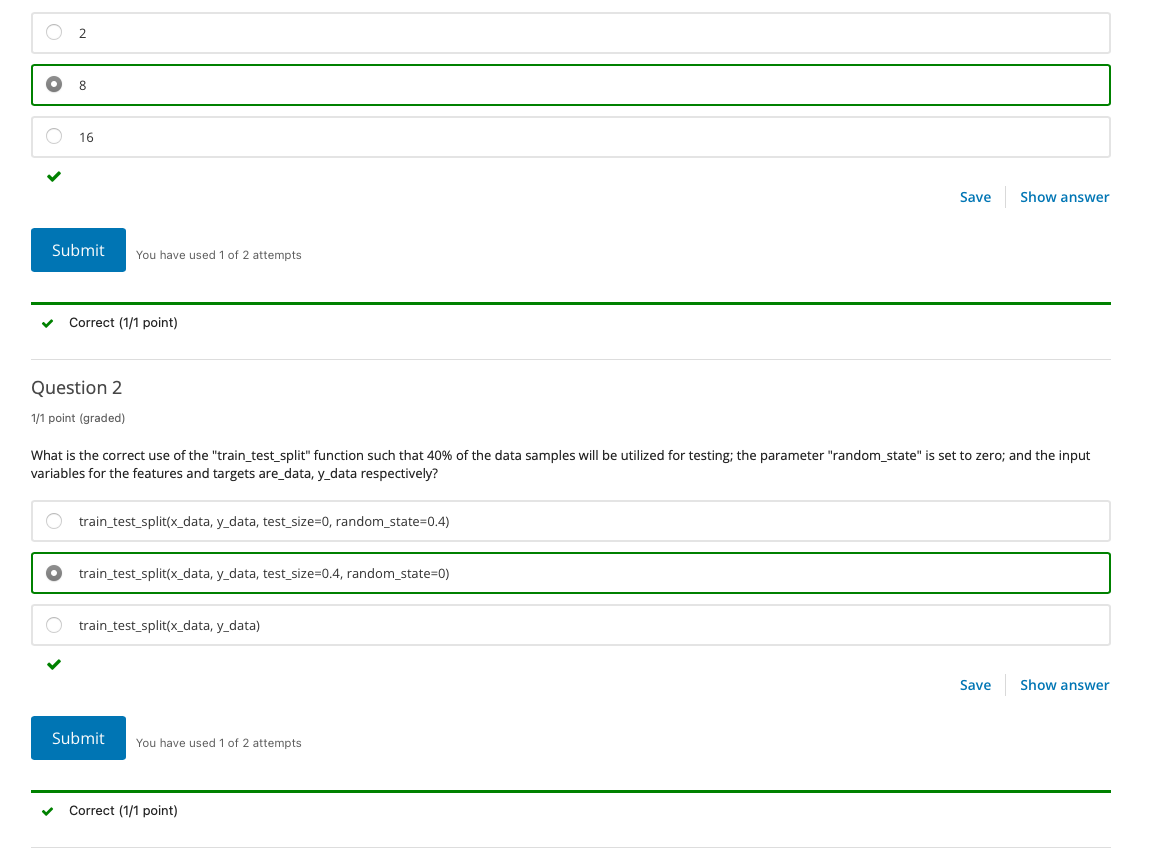

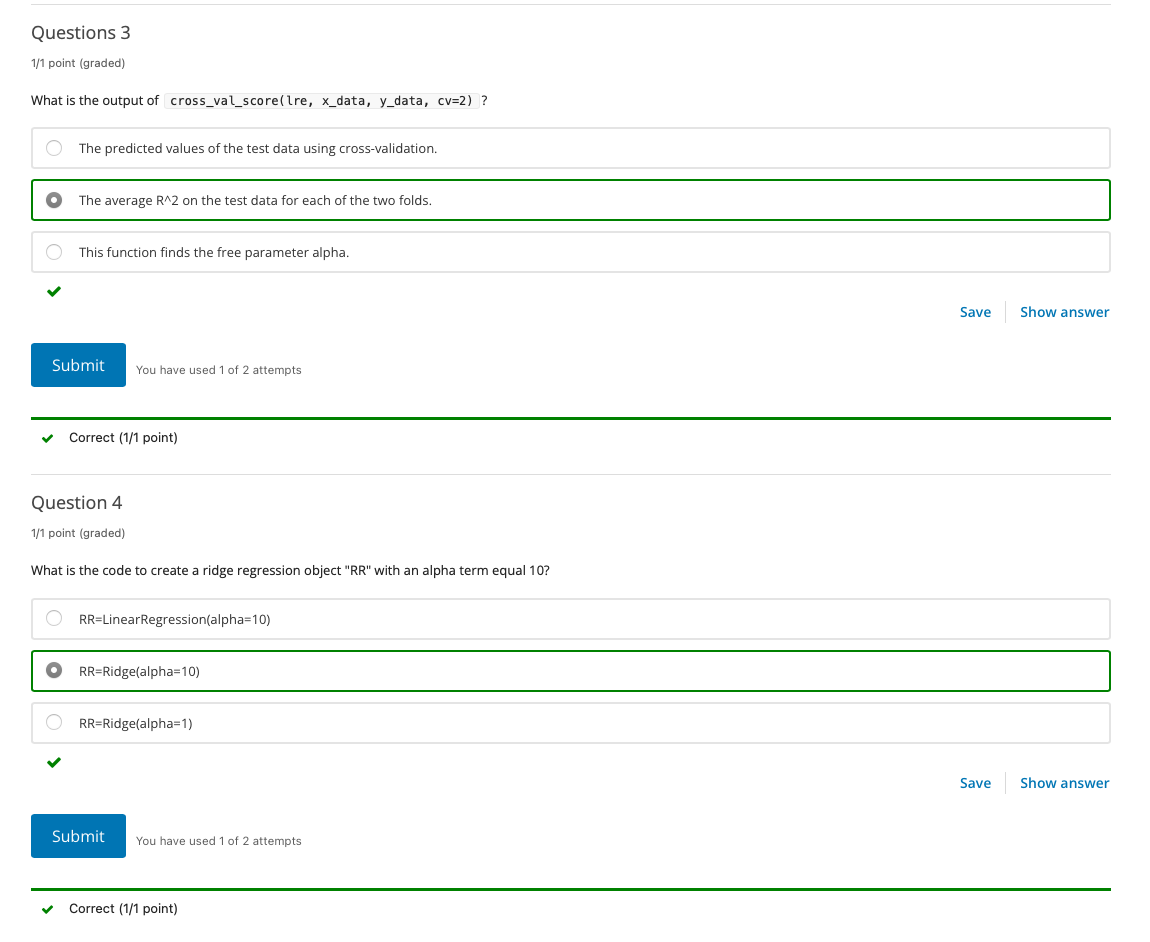

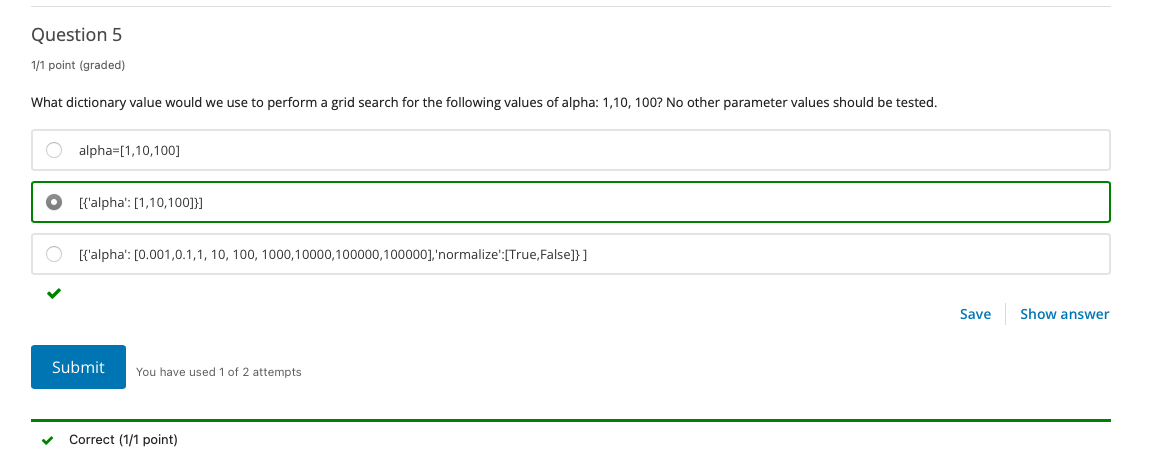

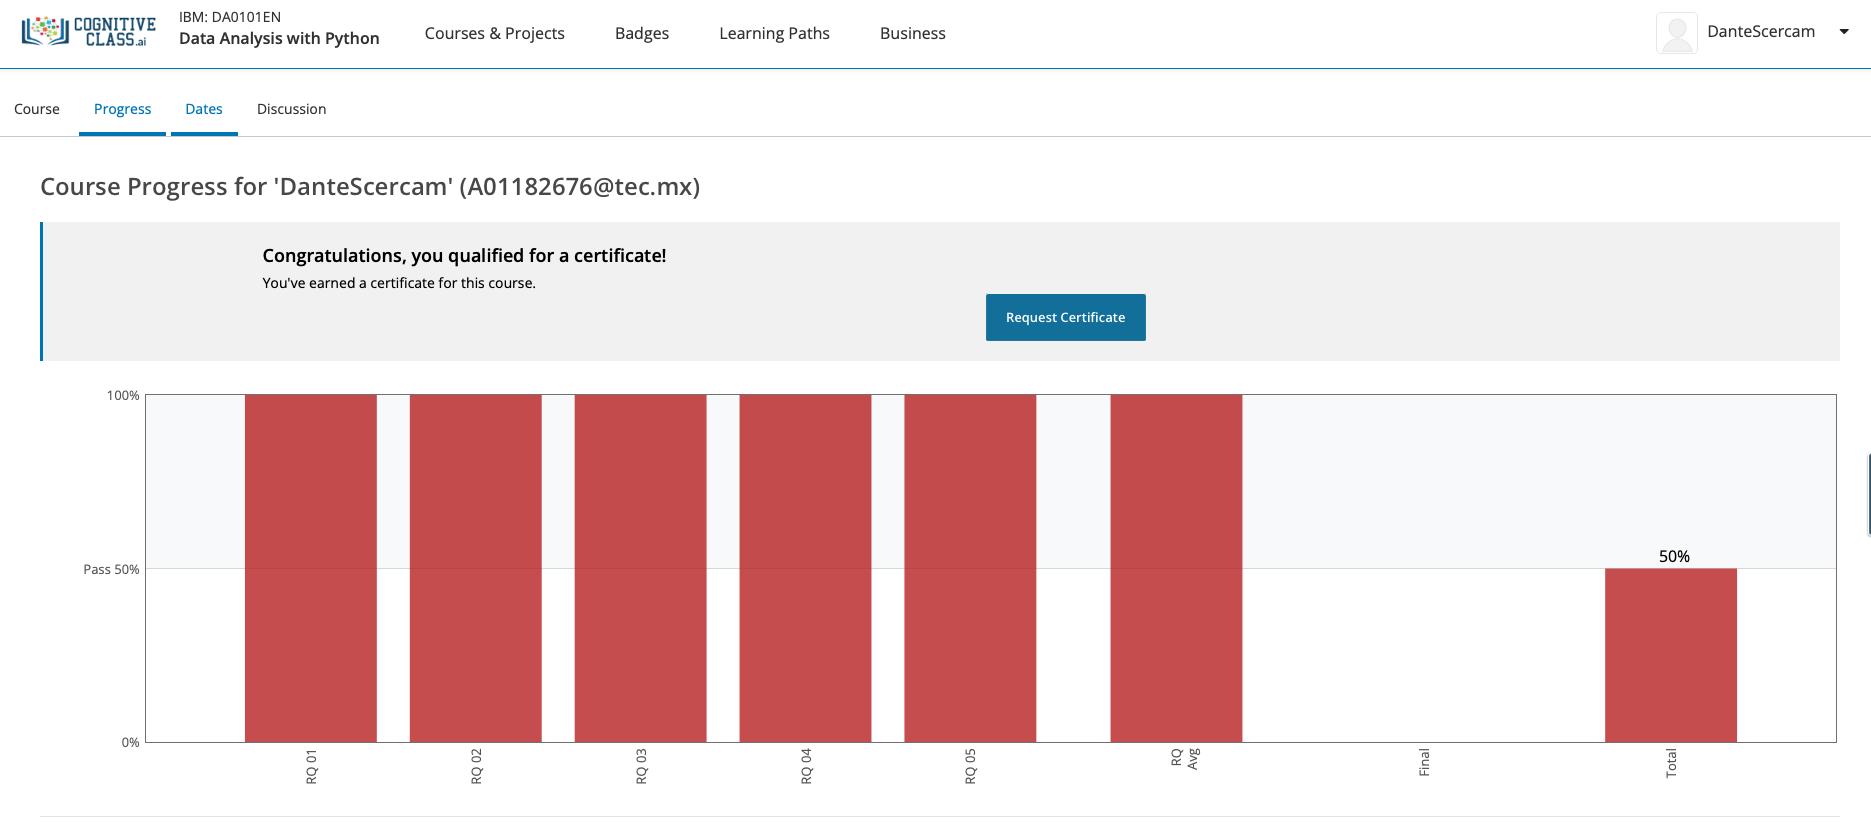